# Wyrażenia regularne

**Wyrażenie regularne** to wzorzec opisujący sekwencję znaków.

Przykłady:

1.   `[0-9]{2}-[0-9]{3}` dopasuje kod pocztowy, np. *00-000*, *00-001*, ..., *99-999*,
2.   `kot[ay]?` dopasuje słowa *kot*, *kota*, *koty*.

## Wyrażenia regularne w Python

In [53]:
import re

### re.search — wyszukanie pierwszego dopasowania

In [54]:
m = re.search("[0-9]{2}-[0-9]{3}", "00-040 Warszawa, 80-299 Gdańsk")

print(m)
print(m.group())

<_sre.SRE_Match object; span=(0, 6), match='00-040'>
00-040


### re.match — sprawdzenie dopasowania od początku ciągu

In [55]:
re.match("[0-9]{2}-[0-9]{3}", "00-040 Warszawa, 80-299 Gdańsk")

<_sre.SRE_Match object; span=(0, 6), match='00-040'>

In [56]:
m = re.match("[0-9]{2}-[0-9]{3}", "Warszawa 00-040")
print(m)

None


### re.fullmatch — dopasowanie całego ciągu

In [57]:
m = re.fullmatch("[0-9]{2}-[0-9]{3}", "00-040 Warszawa, 80-299 Gdańsk")
print(m)

None


In [58]:
re.fullmatch("[0-9]{2}-[0-9]{3}", "00-040")

<_sre.SRE_Match object; span=(0, 6), match='00-040'>

### re.findall i re.finditer — wyszukanie wszystkich dopasowań

W odróżnieniu od poprzednich metod, ta metoda zwraca tablicę ciągów znakowych, a nie obiekt `SRE_Match`.

In [59]:
re.findall("[0-9]{2}-[0-9]{3}", "00-040 Warszawa, 80-299 Gdańsk")

['00-040', '80-299']

In [60]:
for m in re.finditer("[0-9]{2}-[0-9]{3}", "00-040 Warszawa, 80-299 Gdańsk"):
  print(m)

<_sre.SRE_Match object; span=(0, 6), match='00-040'>
<_sre.SRE_Match object; span=(17, 23), match='80-299'>


### re.split — podział napisu

In [61]:
re.split("[0-9]{2}-[0-9]{3}", "00-040 Warszawa, 80-299 Gdańsk")

['', ' Warszawa, ', ' Gdańsk']

In [62]:
re.split("([0-9]{2}-[0-9]{3})", "00-040 Warszawa, 80-299 Gdańsk")

['', '00-040', ' Warszawa, ', '80-299', ' Gdańsk']

In [63]:
re.split("([0-9]{2})-[0-9]{3}", "00-040 Warszawa, 80-299 Gdańsk")

['', '00', ' Warszawa, ', '80', ' Gdańsk']

### re.sub i re.subn — podmiana dopasowania

In [64]:
re.sub("[0-9]{2}-[0-9]{3}", "KOD_POCZTOWY", "00-040 Warszawa, 80-299 Gdańsk")

'KOD_POCZTOWY Warszawa, KOD_POCZTOWY Gdańsk'

In [65]:
re.sub("([0-9]{2})-([0-9]{3})", "[\\1\\2]", "00-040 Warszawa, 80-299 Gdańsk")

'[00040] Warszawa, [80299] Gdańsk'

In [66]:
re.sub("([0-9]{2})-([0-9]{3})", r"[\1\2]", "00-040 Warszawa, 80-299 Gdańsk")

'[00040] Warszawa, [80299] Gdańsk'

In [67]:
def postal_code(match):
  text = match.group()
  if text.startswith("00"):
    return "WAW"
  elif text.startswith("80"):
    return "GDA"
  else:
    return "UNK"

re.sub("([0-9]{2})-([0-9]{3})", postal_code, "00-040 Warszawa, 80-299 Gdańsk")

'WAW Warszawa, GDA Gdańsk'

In [68]:
re.subn("([0-9]{2})-([0-9]{3})", "KOD_POCZTOWY", "00-040 Warszawa, 80-299 Gdańsk")

('KOD_POCZTOWY Warszawa, KOD_POCZTOWY Gdańsk', 2)

## Kompilowanie reguł

*   wzorzec reprezentowany jest jako obiekt, który posiada te same metody co moduł `re`. Korzystając z obiektu wzorca nie trzeba już podawać argumentu ze wzorcem w postaci tekstowej,
*   eliminuje czas kompilacji wzorca przy każdym wywołaniu metody z modułu `re`.



In [69]:
pattern_postal_code = re.compile("[0-9]{2}-[0-9]{3}")
pattern_postal_code.__class__

_sre.SRE_Pattern

In [70]:
pattern_postal_code.sub("KOD", "00-040 Warszawa, 80-299 Gdańsk")

'KOD Warszawa, KOD Gdańsk'

In [71]:
re.sub("[0-9]{2}-[0-9]{3}", "KOD", "00-040 Warszawa, 80-299 Gdańsk")

'KOD Warszawa, KOD Gdańsk'

In [72]:
%%time
for n in range(10**6):
  re.sub("[0-9]{2}-[0-9]{3}", "KOD", "00-040 Warszawa, 80-299 Gdańsk")

CPU times: user 1.51 s, sys: 0 ns, total: 1.51 s
Wall time: 1.51 s


In [73]:
%%time
pattern_postal_code = re.compile("[0-9]{2}-[0-9]{3}")
for n in range(10**6):
  pattern_postal_code.sub("KOD", "00-040 Warszawa, 80-299 Gdańsk")

CPU times: user 1.07 s, sys: 2.03 ms, total: 1.07 s
Wall time: 1.08 s


## Składnia wyrażeń regularnych w Python

### Znaki specjalne

`. ^ $ * + ? ( ) [ ]`

In [74]:
try:
  m = re.match("(", "(w nawiasie)")
  print(m)
except Exception as e:
  print(e)

missing ), unterminated subpattern at position 0


**Dopasowanie znaków specjalnych**

In [75]:
re.match("\(", "(w nawiasie)")

<_sre.SRE_Match object; span=(0, 1), match='('>

In [76]:
re.match("[(]", "(w nawiasie)")

<_sre.SRE_Match object; span=(0, 1), match='('>

### Dopasowanie granicy



*   `^` — początek sekwencji,
*   `$` — koniec sekwencji,
*   `\b` — granica słowa.



In [77]:
for m in re.finditer("kot", "kot, (kot), kotlina, kot"):
  print(m)

<_sre.SRE_Match object; span=(0, 3), match='kot'>
<_sre.SRE_Match object; span=(6, 9), match='kot'>
<_sre.SRE_Match object; span=(12, 15), match='kot'>
<_sre.SRE_Match object; span=(21, 24), match='kot'>


In [78]:
for m in re.finditer("^kot", "kot, (kot), kotlina, kot"):
  print(m)

<_sre.SRE_Match object; span=(0, 3), match='kot'>


In [79]:
for m in re.finditer("kot$", "kot, (kot), kotlina, kot"):
  print(m)

<_sre.SRE_Match object; span=(21, 24), match='kot'>


In [80]:
for m in re.finditer(r"\bkot\b", "kot, (kot), kotlina, kot"):
  print(m)

<_sre.SRE_Match object; span=(0, 3), match='kot'>
<_sre.SRE_Match object; span=(6, 9), match='kot'>
<_sre.SRE_Match object; span=(21, 24), match='kot'>


### Opcjonalność i powtórzenia

*   `?` — opcjonalne dopasowanie elementu,
*   `*` — zero lub więcej powtórzeń,
*   `+` — jedno lub więcej powtórzeń,
*   `{n}` — dokładnie *n* powtórzeń,
*   `{n,}` — co najmniej *n* powtórzeń,
*   `{n,m}` — od *n* do *m* powtórzeń.



In [81]:
re.findall("tak", "ta tak taaaaaak taaakkk")

['tak']

In [82]:
re.findall("ta+k", "ta tak taaaaaak taaakkk")

['tak', 'taaaaaak', 'taaak']

In [83]:
re.findall("ta+k*", "ta tak taaaaaak taaakkk")

['ta', 'tak', 'taaaaaak', 'taaakkk']

In [84]:
re.findall("[0-9]{2}-[0-9]{3}", "00-040")

['00-040']

### Grupy

Używając nawiasów okrągłych `(wzorzec)` można wydzielić fragmenty wyrażenia regularnego tworząc **grupy**.


**Zastosowanie grup**

*   odwołanie się do wyniku dopasowania:
  * w samym wzorcu, 
  * w metodzie `sub`,
  * w wyniku poprzez metodę `m.group(n)` lub `m.group("nazwa")`,
*   określenie liczby powtórzeń dla całej grupy:
  *   `(wzorzec)?` — opcjonalne dopasowanie,
  *   `(wzorzec)*` — wielokrotne powtórzenie,
  *   `(wzorzec)+` — jedno lub więcej powtórzeń,
  *   `(wzorzec){...}` — określona liczba powtórzeń powtórzeń,
*   `(wzorzec1|wzorzec2|wzorzec3)` — alternatywa.

**Rodzaje grup**

*   `(wzorzec)` — przechwytująca,
*   `(?:wzorzec)` — nieprzechwytująca,
*   `(?P<nazwa>wzorzec)` — nazwana.



In [85]:
for m in re.finditer("biały kubek", "biały kubek, czerwony kubek, kubek"):
  print(m.group() + " => " + str(m.groups()))

biały kubek => ()


In [86]:
for m in re.finditer("(biały) (kubek)", "biały kubek, czerwony kubek, kubek"):
  print(m.group() + " => " + str(m.groups()))

biały kubek => ('biały', 'kubek')


In [87]:
for m in re.finditer("(biały|czerwony) (kubek)", "biały kubek, czerwony kubek, kubek"):
  print(m.group() + " => " + str(m.groups()))

biały kubek => ('biały', 'kubek')
czerwony kubek => ('czerwony', 'kubek')


In [88]:
for m in re.finditer("(biały|czerwony)? (kubek)", "biały kubek, czerwony kubek, kubek"):
  print(m.group() + " => " + str(m.groups()))

biały kubek => ('biały', 'kubek')
czerwony kubek => ('czerwony', 'kubek')
 kubek => (None, 'kubek')


In [89]:
for m in re.finditer("((biały|czerwony) )?(kubek)", "biały kubek, czerwony kubek, kubek"):
  print(m.group() + " => " + str(m.groups()))

biały kubek => ('biały ', 'biały', 'kubek')
czerwony kubek => ('czerwony ', 'czerwony', 'kubek')
kubek => (None, None, 'kubek')


In [90]:
for m in re.finditer("(?:(biały|czerwony) )?(kubek)", "biały kubek, czerwony kubek, kubek"):
  print(m.group() + " => " + str(m.groups()))

biały kubek => ('biały', 'kubek')
czerwony kubek => ('czerwony', 'kubek')
kubek => (None, 'kubek')


**Grupy nazwane**

In [118]:
text = "biały kubek, czerwony kubek, kubek zielony"
regex_color = r"\b(?P<KOLOR>biały|czerwony|zielony)\b"
regex_obj = r"\b(?P<PRZEDMIOT>kubek)\b"
regexes = [f"{regex_color} {regex_obj}", f"{regex_obj} {regex_color}"]

matches = []
for regex in regexes:
  for m in re.finditer(regex, text):
    matches.append(m)

for m in matches:
  print(f"{m.group():<15}  => KOLOR:{m.group('KOLOR'):<8}, PRZEDMIOT: {m.group('PRZEDMIOT')}")

biały kubek      => KOLOR:biały   , PRZEDMIOT: kubek
czerwony kubek   => KOLOR:czerwony, PRZEDMIOT: kubek
kubek zielony    => KOLOR:zielony , PRZEDMIOT: kubek


**Odwołanie do grupy wewnątrz wyrażenia regularnego**

In [122]:
for m in re.finditer(r"[0-9]{2}[-/][0-9]{2}[-/][0-9]{4}", "10-10-2020, 10/10/2020, 10-10/2020"):
  print(m)

<_sre.SRE_Match object; span=(0, 10), match='10-10-2020'>
<_sre.SRE_Match object; span=(12, 22), match='10/10/2020'>
<_sre.SRE_Match object; span=(24, 34), match='10-10/2020'>


In [123]:
for m in re.finditer(r"[0-9]{2}([-/])[0-9]{2}\1[0-9]{4}", "10-10-2020, 10/10/2020, 10-10/2020"):
  print(m)

<_sre.SRE_Match object; span=(0, 10), match='10-10-2020'>
<_sre.SRE_Match object; span=(12, 22), match='10/10/2020'>


### Zbiory znaków

Dopasowują znak należacy do danej grupy znaków:

*   `.` — dopasowuje dowolny znak. Domyślnie nie dopasowuje znaku nowej linii. Znak nowej linii zostanie dopasowany po użyciu flagi `re.DOTALL` lub `(?s)`.
*   `[...]` — definicja zbioru:
  * `[abcd]` — wskazanie konkretnych znaków,
  * `[a-z]`, `[0-9]` — wskazanie zakresu znaków,
  * `[^abcd]`, `[^0-9]` — wykluczenie wskazanych znaków,
* skróty:
  * `\d` — cyfry,
  * `\D` — wszystko poza cyframi,
  * `\w` — cyfry i litery,
  * `\W` — wszystko poza cyframi i literami,
  * `\s` — białe znaki,
  * `\S` — wszystko poza białymi znakami.

In [93]:
re.findall(".+", "jeden\ndwa")

['jeden', 'dwa']

In [94]:
re.findall(".+", "jeden\ndwa", re.DOTALL)

['jeden\ndwa']

In [95]:
re.findall("(?s).+", "jeden\ndwa")

['jeden\ndwa']

In [96]:
re.findall("\w+", "jak jeść")

['jak', 'jeść']

### Warunki kontekstowe


* operatory sprawdzające warunek bez modyfikacji dopasowania:
  *   `(?=wzorzec)` — dopasuje, jeżeli następujący ciąg pasuje do wzorca,
  *   `(?!wzorzec)` — dopasuje, jeżeli następujący ciąg **nie** pasuje do wzorca,
  *   `(?<=wzorzec)` — dopasuje, jeżeli poprzedzający ciąg pasuje do wzorca,
  *   `(?<!wzorzec)` — dopasuje, jeżeli poprzedzający ciąg **nie** pasuje do wzorca, 
* dopasowanie kontekstowe:
  * `\n` — dopasuj wartość przypisaną do grupy *n*, np. `\1`,
  * `(?P=nazwa) — dopasuj wartość przypisaną do grupy o nazwie `nazwa`,
  * `(?(n lub nazwa)wzorzec-tak|wzorzec-nie)` — jeżeli grupa o numerze *n* lub nazwie *nazwa* została dopasowana, to użyty zostanie wzorzec `wzorzec-tak`, a przeciwnym wypadku `wzorzec-nie`.





**Dopasowanie z pominięciem negacji**

In [100]:
for m in re.finditer("lubię \w+", "lubię kawę, nie lubię bawarki"):
  print(m.group())

lubię kawę
lubię bawarki


In [101]:
for m in re.finditer(r"(?<!\bnie )lubię \w+", "lubię kawę, nie lubię bawarki"):
  print(m.group())

lubię kawę


**Dopasowanie z domknięciem**

In [102]:
for m in re.finditer("[(]?\w+[)]?", "słowo (nawiasy) (słowo słowo)"):
  print(m.group())

słowo
(nawiasy)
(słowo
słowo)


In [103]:
for m in re.finditer("([(])?\w+(?(1)[)]|)", "słowo (nawiasy) (słowo słowo)"):
  print(m.group())

słowo
(nawiasy)
słowo
słowo


## Przydatne narzędzia i zasoby

### Dokumentacja modułu re

https://docs.python.org/3/library/re.html



### System do testowania wyrażeń regularnych

http://regex101.com

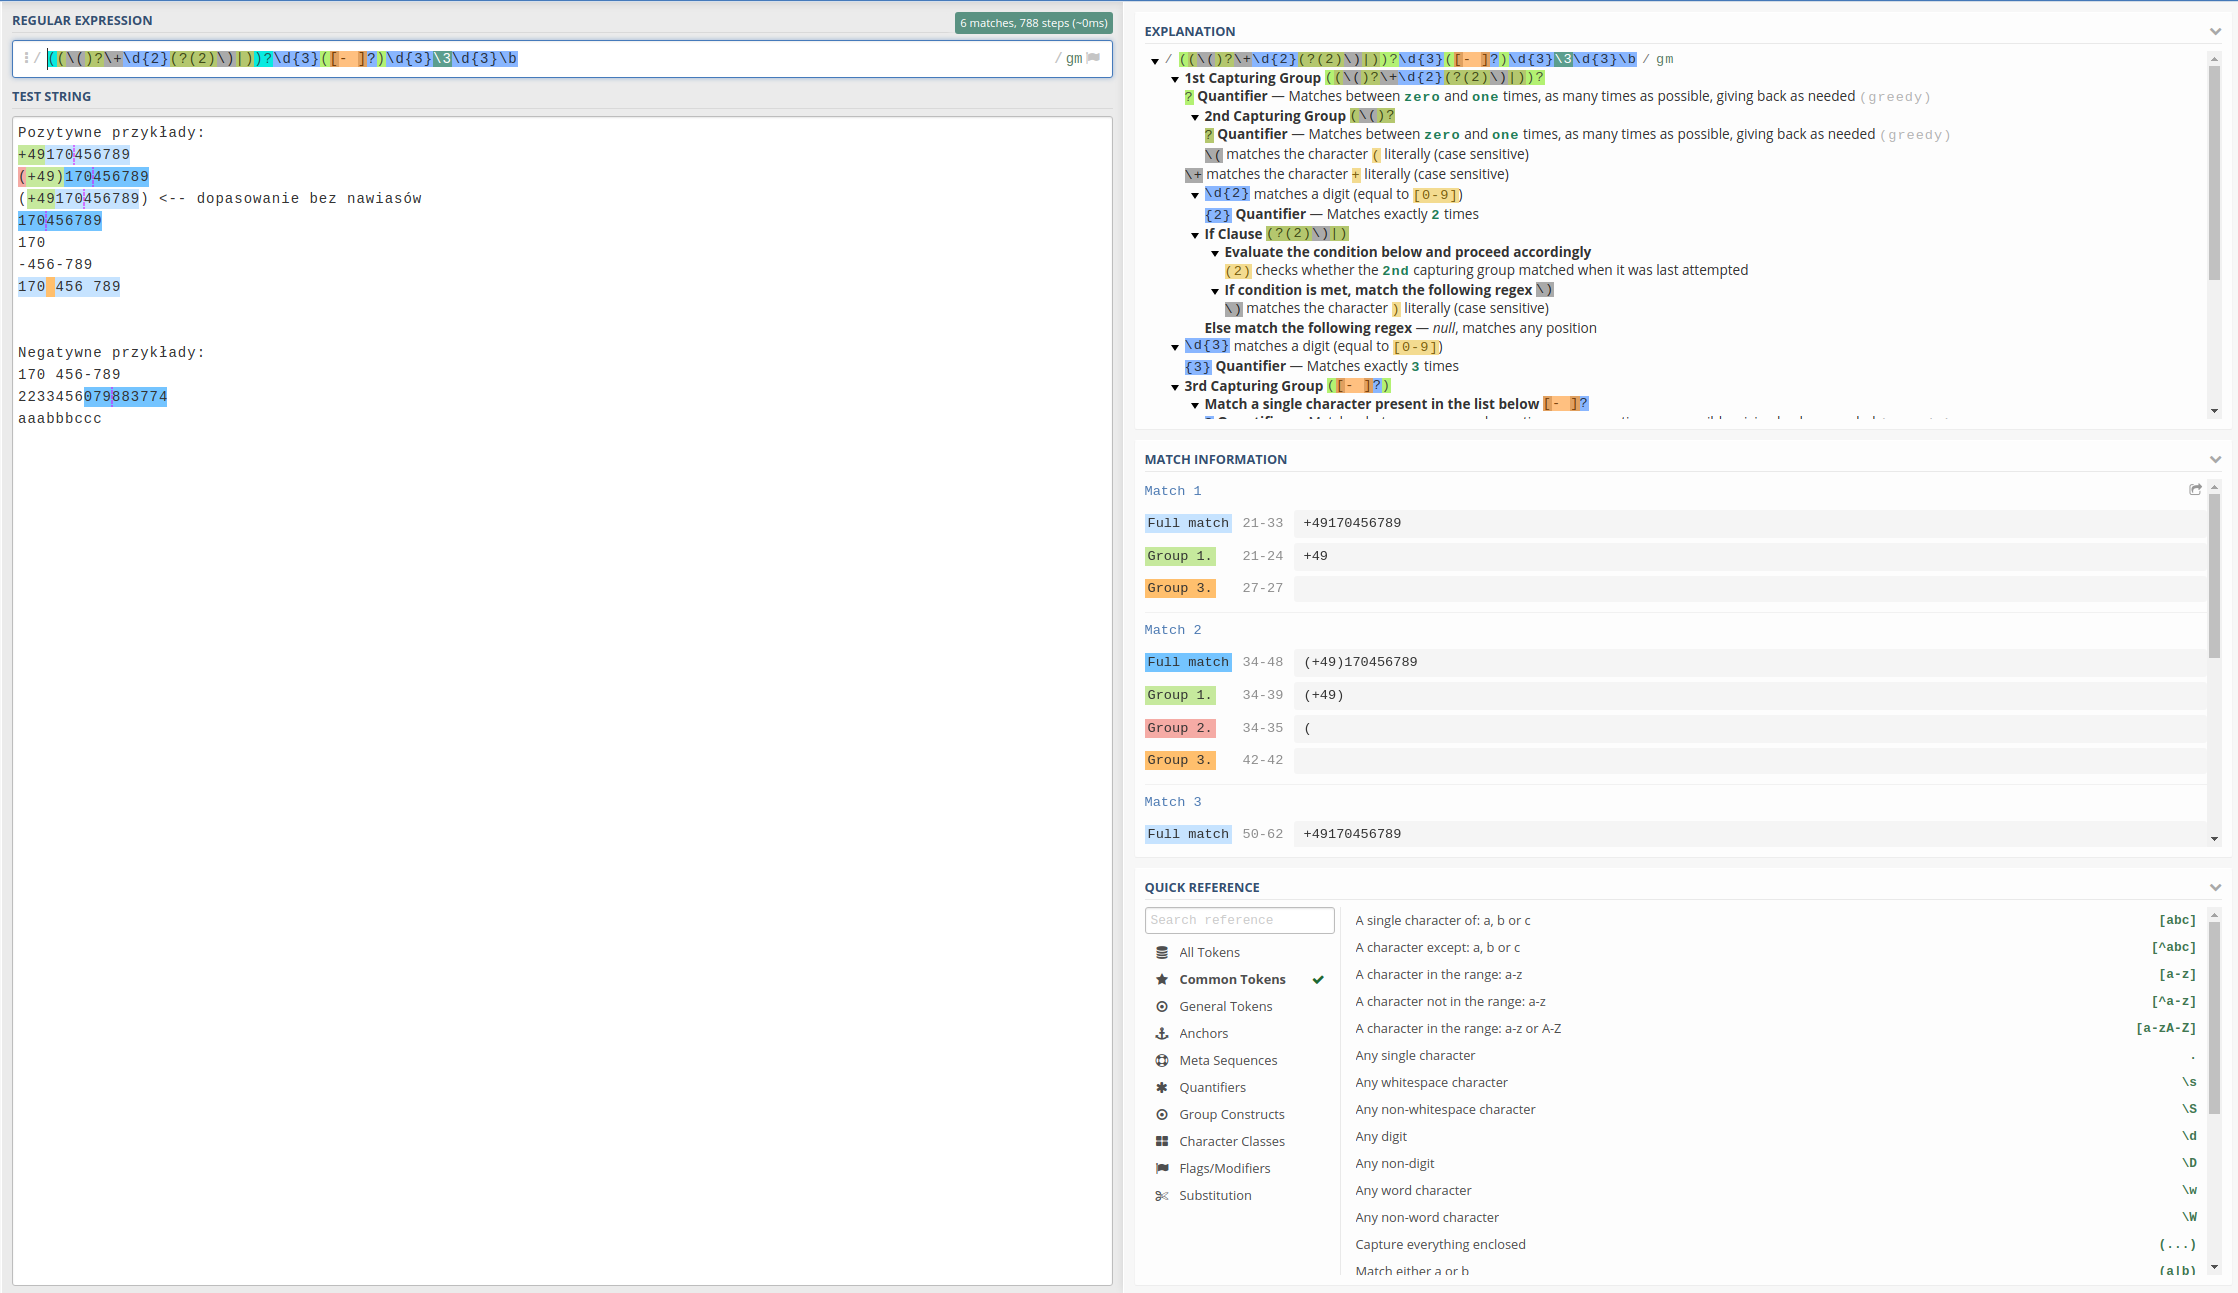

In [104]:
test_cases = """
Pozytywne przykłady:
+49170456789
(+49)170456789
(+49170456789) <-- dopasowanie bez nawiasów
170456789
170
-456-789
170 456 789


Negatywne przykłady:
170 456-789
2233456079883774
aaabbbccc
"""

regex = r"(?<!\d)((\()?\+\d{2}(?(2)\)|))?\d{3}([- ]?)\d{3}\3\d{3}\b"

for m in re.finditer(regex, test_cases):
  print(m.group())

+49170456789
(+49)170456789
+49170456789
170456789
170 456 789
